In [141]:
#import tensorflow as tf
import pandas as pd
import numpy as np

In [142]:
rowData=pd.read_csv('data2.csv')
rowData.drop('Item',axis=1,inplace=True)
print(rowData.head())

     Center  Min Price  Max Price  Total Arrival  Year  Month  Min Temp °C  \
0  Chennai        1902       3089          12860  2010      1           24   
1  Chennai        1589       2409          11570  2010      2           28   
2  Chennai        1122       1968          12680  2010      3           25   
3  Chennai         820       1387          11780  2010      4           30   
4  Chennai         833       1463          12320  2010      5           33   

   Max Temp °C  Wind Speed(Km/h)  RainFall(mm)  Humidity(%)  Cloud(%)  \
0           27                19           0.7           75        24   
1           24                 9           0.0           73         1   
2           31                12           0.0           70         0   
3           36                21           0.0           70         6   
4           29                12           3.6           73        38   

   Pressure(mb)  Yield  
0          1012      0  
1          1015      1  
2          1013  

In [143]:
print(rowData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Center            706 non-null    object 
 1   Min Price         706 non-null    int64  
 2   Max Price         706 non-null    int64  
 3   Total Arrival     706 non-null    int64  
 4   Year              706 non-null    int64  
 5   Month             706 non-null    int64  
 6   Min Temp °C       706 non-null    int64  
 7   Max Temp °C       706 non-null    int64  
 8   Wind Speed(Km/h)  706 non-null    int64  
 9   RainFall(mm)      706 non-null    float64
 10  Humidity(%)       706 non-null    int64  
 11  Cloud(%)          706 non-null    int64  
 12  Pressure(mb)      706 non-null    int64  
 13  Yield             706 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 77.3+ KB
None


# Data Cleaning

In [144]:
rowData.iloc[:,:-1]= rowData.iloc[:,:-1].replace(0, np.nan)
rowData.iloc[:,:-2]=rowData.iloc[:,:-2].fillna(rowData.iloc[:,:-2].groupby('Center').transform('mean'))
xRow=rowData.iloc[:,:-1]
Y=rowData.iloc[:,-1]

# Feature Encoding

In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEnc= OneHotEncoder()
labelEnc=LabelEncoder()

In [146]:
oneValue=oneHotEnc.fit_transform(xRow.Center.values.reshape(-1,1)).toarray()
oneValue

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [147]:
oneValueDf=pd.DataFrame(oneValue,columns=[""+str(xRow.Center.unique()[i]) for i in range(len(rowData.Center.unique()))])
oneValueDf=oneValueDf.apply(lambda x:x.astype('int32'))
oneValueDf.head()

,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [148]:
xOneHot=pd.concat([oneValueDf,xRow],axis=1)
xOneHot.drop('Center',axis=1,inplace=True)
xOneHot.head()

,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%),Pressure(mb)
0,0,0,0,0,1,1902.0,3089.0,12860.0,2010,1,24,27,19,0.700000,75,24.000000,1012
1,0,0,0,0,1,1589.0,2409.0,11570.0,2010,2,28,24,9,10.480899,73,1.000000,1015
2,0,0,0,0,1,1122.0,1968.0,12680.0,2010,3,25,31,12,10.480899,70,31.553846,1013
3,0,0,0,0,1,820.0,1387.0,11780.0,2010,4,30,36,21,10.480899,70,6.000000,1008
4,0,0,0,0,1,833.0,1463.0,12320.0,2010,5,33,29,12,3.600000,73,38.000000,1010


# Feature Scalling

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
ScallerN=MinMaxScaler()

In [150]:
toBeScalled=xOneHot.iloc[:,len(rowData.Center.unique()):-1]
oneHotCenters=xOneHot.iloc[:,:len(rowData.Center.unique())]
toBeScalled.head()

,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%)
0,1902.0,3089.0,12860.0,2010,1,24,27,19,0.700000,75,24.000000
1,1589.0,2409.0,11570.0,2010,2,28,24,9,10.480899,73,1.000000
2,1122.0,1968.0,12680.0,2010,3,25,31,12,10.480899,70,31.553846
3,820.0,1387.0,11780.0,2010,4,30,36,21,10.480899,70,6.000000
4,833.0,1463.0,12320.0,2010,5,33,29,12,3.600000,73,38.000000


In [199]:
scalledN=ScallerN.fit_transform(toBeScalled)
scalledN=pd.DataFrame(scalledN,columns=[x for x in toBeScalled.columns])
xLab=pd.DataFrame(labelEnc.fit_transform(xRow.Center.copy()),columns=['Center'])
print(labelEnc.classes_)
xLabelEncN=pd.concat([xLab,scalledN],axis=1)
print(xRow.Center.unique())
print(xLabelEncN.Center.unique())
xOneHotN=pd.concat([oneHotCenters,scalledN],axis=1)
xOneHotN.head()

['Ahmedabad' 'Amritsar' 'Bangaluru' 'Bhopal' 'Chennai ']
['Chennai ' 'Ahmedabad' 'Amritsar' 'Bangaluru' 'Bhopal']
[4 0 1 2 3]


,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%)
0,0,0,0,0,1,0.165991,0.204624,0.065074,0.0,0.000000,0.56250,0.305556,0.592593,0.003827,0.744444,0.232323
1,0,0,0,0,1,0.133479,0.152393,0.058182,0.0,0.090909,0.68750,0.222222,0.222222,0.066205,0.722222,0.000000
2,0,0,0,0,1,0.084969,0.118519,0.064113,0.0,0.181818,0.59375,0.416667,0.333333,0.066205,0.688889,0.308625
3,0,0,0,0,1,0.053599,0.073892,0.059304,0.0,0.272727,0.75000,0.555556,0.666667,0.066205,0.688889,0.050505
4,0,0,0,0,1,0.054950,0.079730,0.062189,0.0,0.363636,0.84375,0.361111,0.333333,0.022321,0.722222,0.373737


In [152]:
ScallerR=RobustScaler()
scalledR=ScallerR.fit_transform(toBeScalled)
scalledR=pd.DataFrame(scalledR,columns=[x for x in toBeScalled.columns])
xLabelEncR=pd.concat([xLab,scalledR],axis=1)
xOneHotR=pd.concat([oneHotCenters,scalledR],axis=1)
xOneHotR.head()

,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%)
0,0,0,0,0,1,0.533762,0.685121,0.140574,-0.833333,-0.869565,0.000,-0.625,1.166667,-1.257022,0.500000,-0.076837
1,0,0,0,0,1,0.254796,0.257314,0.043079,-0.833333,-0.695652,0.500,-1.000,-0.500000,0.164435,0.447368,-0.824805
2,0,0,0,0,1,-0.161425,-0.020132,0.126970,-0.833333,-0.521739,0.125,-0.125,0.000000,0.164435,0.368421,0.168816
3,0,0,0,0,1,-0.430588,-0.385656,0.058950,-0.833333,-0.347826,0.750,0.500,1.500000,0.164435,0.368421,-0.662203
4,0,0,0,0,1,-0.419001,-0.337842,0.099762,-0.833333,-0.173913,1.125,-0.375,0.000000,-0.835565,0.447368,0.378447


# Feature Selection

## Chi-squared Test

In [153]:
from scipy.stats import chi2_contingency

In [154]:
pd.crosstab(rowData.Center,Y)
#cs.fit([xCat],Y)

Yield,0,1
Center,,
Ahmedabad,78,65
Amritsar,67,65
Bangaluru,69,75
Bhopal,75,69
Chennai,68,75


In [155]:
chiRel=chi2_contingency(pd.crosstab(rowData.Center,Y))
print("pValue :",chiRel[1])
if(chiRel[1]>0.05):
    print('Center Has No Relationship with Shortage')
else:
    print('Center Has Relationship With Shortage')

pValue : 0.7423106080206197
Center Has No Relationship with Shortage


## F-Test

In [156]:
from sklearn.feature_selection import f_classif,SelectKBest
fs=SelectKBest(score_func=f_classif,k=10)
fs.fit(xOneHotN,Y)
fsScore=pd.DataFrame(fs.scores_,columns=['Score'])
fsCol=pd.DataFrame(xOneHotN.columns,columns=['Category'])
fsDf=pd.concat([fsCol,fsScore],axis=1)
fsDf.nlargest(10,columns='Score')


,Category,Score
8,Year,22.150577
7,Total Arrival,18.876964
11,Max Temp °C,10.732223
5,Min Price,9.815931
14,Humidity(%),8.300431
13,RainFall(mm),6.638772
10,Min Temp °C,5.358360
6,Max Price,2.971594
15,Cloud(%),2.593311
0,Chennai,1.134325


In [157]:
fs.fit(xOneHotR,Y)
fsScore=pd.DataFrame(fs.scores_,columns=['Score'])
fsCol=pd.DataFrame(xOneHotR.columns,columns=['Category'])
fsDf2=pd.concat([fsCol,fsScore],axis=1)
fsDf2.nlargest(10,columns='Score')

,Category,Score
8,Year,22.150577
7,Total Arrival,18.876964
11,Max Temp °C,10.732223
5,Min Price,9.815931
14,Humidity(%),8.300431
13,RainFall(mm),6.638772
10,Min Temp °C,5.358360
6,Max Price,2.971594
15,Cloud(%),2.593311
0,Chennai,1.134325


In [158]:
fs.fit(xLabelEncN,Y)
fsScore=pd.DataFrame(fs.scores_,columns=['Score'])
fsCol=pd.DataFrame(xLabelEncN.columns,columns=['Category'])
fsDf3=pd.concat([fsCol,fsScore],axis=1)
fsDf3.nlargest(10,columns='Score')

,Category,Score
4,Year,22.150577
3,Total Arrival,18.876964
7,Max Temp °C,10.732223
1,Min Price,9.815931
10,Humidity(%),8.300431
9,RainFall(mm),6.638772
6,Min Temp °C,5.358360
2,Max Price,2.971594
11,Cloud(%),2.593311
0,Center,0.918425


## Pearson Correlation 


In [159]:
cN=pd.concat([xOneHotN,Y],axis=1)
cN.corr()

,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%),Yield
Chennai,1.000000,-0.241682,-0.255110,-0.255110,-0.253996,-0.102433,0.031371,-0.103314,0.010474,-0.003348,0.110188,0.278747,0.051664,-0.001985,-0.223424,-0.034606,-0.040108
Ahmedabad,-0.241682,1.000000,-0.242742,-0.242742,-0.241682,0.022651,-0.017287,-0.264361,-0.055184,0.002169,-0.176747,0.135542,-0.446010,-0.127084,-0.252809,-0.228576,-0.001832
Amritsar,-0.255110,-0.242742,1.000000,-0.256228,-0.255110,-0.008127,0.008693,0.763668,0.016251,0.002290,-0.265041,-0.226905,0.078271,-0.004522,0.252149,0.205152,0.026829
Bangaluru,-0.255110,-0.242742,-0.256228,1.000000,-0.255110,-0.132893,-0.212931,-0.308468,0.016251,0.002290,-0.078868,0.017173,-0.105714,0.089294,-0.180236,-0.029564,-0.015356
Bhopal,-0.253996,-0.241682,-0.255110,-0.255110,1.000000,0.221846,0.190168,-0.096609,0.010474,-0.003348,0.406078,-0.199961,0.408530,0.040277,0.396577,0.080306,0.030383
Min Price,-0.102433,0.022651,-0.008127,-0.132893,0.221846,1.000000,0.952315,0.046563,0.219167,0.286826,-0.001765,-0.259149,0.028426,0.080242,0.301823,0.209349,0.117266
Max Price,0.031371,-0.017287,0.008693,-0.212931,0.190168,0.952315,1.000000,0.095413,0.329347,0.263687,0.022377,-0.215319,0.055237,0.058998,0.257067,0.192012,0.064833
Total Arrival,-0.103314,-0.264361,0.763668,-0.308468,-0.096609,0.046563,0.095413,1.000000,0.077268,0.105569,-0.147940,-0.214390,0.094427,-0.000064,0.289251,0.220773,-0.161597
Year,0.010474,-0.055184,0.016251,0.016251,0.010474,0.219167,0.329347,0.077268,1.000000,-0.007468,0.073741,-0.027347,0.159198,-0.003310,-0.031647,0.087114,-0.174654
Month,-0.003348,0.002169,0.002290,0.002290,-0.003348,0.286826,0.263687,0.105569,-0.007468,1.000000,0.209051,0.061877,-0.073027,0.097596,0.226715,0.253302,0.016398


In [160]:
cR=pd.concat([xOneHotR,Y],axis=1)
cR.corr()

,Chennai,Ahmedabad,Amritsar,Bangaluru,Bhopal,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%),Yield
Chennai,1.000000,-0.241682,-0.255110,-0.255110,-0.253996,-0.102433,0.031371,-0.103314,0.010474,-0.003348,0.110188,0.278747,0.051664,-0.001985,-0.223424,-0.034606,-0.040108
Ahmedabad,-0.241682,1.000000,-0.242742,-0.242742,-0.241682,0.022651,-0.017287,-0.264361,-0.055184,0.002169,-0.176747,0.135542,-0.446010,-0.127084,-0.252809,-0.228576,-0.001832
Amritsar,-0.255110,-0.242742,1.000000,-0.256228,-0.255110,-0.008127,0.008693,0.763668,0.016251,0.002290,-0.265041,-0.226905,0.078271,-0.004522,0.252149,0.205152,0.026829
Bangaluru,-0.255110,-0.242742,-0.256228,1.000000,-0.255110,-0.132893,-0.212931,-0.308468,0.016251,0.002290,-0.078868,0.017173,-0.105714,0.089294,-0.180236,-0.029564,-0.015356
Bhopal,-0.253996,-0.241682,-0.255110,-0.255110,1.000000,0.221846,0.190168,-0.096609,0.010474,-0.003348,0.406078,-0.199961,0.408530,0.040277,0.396577,0.080306,0.030383
Min Price,-0.102433,0.022651,-0.008127,-0.132893,0.221846,1.000000,0.952315,0.046563,0.219167,0.286826,-0.001765,-0.259149,0.028426,0.080242,0.301823,0.209349,0.117266
Max Price,0.031371,-0.017287,0.008693,-0.212931,0.190168,0.952315,1.000000,0.095413,0.329347,0.263687,0.022377,-0.215319,0.055237,0.058998,0.257067,0.192012,0.064833
Total Arrival,-0.103314,-0.264361,0.763668,-0.308468,-0.096609,0.046563,0.095413,1.000000,0.077268,0.105569,-0.147940,-0.214390,0.094427,-0.000064,0.289251,0.220773,-0.161597
Year,0.010474,-0.055184,0.016251,0.016251,0.010474,0.219167,0.329347,0.077268,1.000000,-0.007468,0.073741,-0.027347,0.159198,-0.003310,-0.031647,0.087114,-0.174654
Month,-0.003348,0.002169,0.002290,0.002290,-0.003348,0.286826,0.263687,0.105569,-0.007468,1.000000,0.209051,0.061877,-0.073027,0.097596,0.226715,0.253302,0.016398


# Model integration 

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [162]:
rowData.head()

,Center,Min Price,Max Price,Total Arrival,Year,Month,Min Temp °C,Max Temp °C,Wind Speed(Km/h),RainFall(mm),Humidity(%),Cloud(%),Pressure(mb),Yield
0,Chennai,1902.0,3089.0,12860.0,2010,1,24,27,19,0.700000,75,24.000000,1012,0
1,Chennai,1589.0,2409.0,11570.0,2010,2,28,24,9,10.480899,73,1.000000,1015,1
2,Chennai,1122.0,1968.0,12680.0,2010,3,25,31,12,10.480899,70,31.553846,1013,1
3,Chennai,820.0,1387.0,11780.0,2010,4,30,36,21,10.480899,70,6.000000,1008,1
4,Chennai,833.0,1463.0,12320.0,2010,5,33,29,12,3.600000,73,38.000000,1010,1


## Choosing Features

In [200]:
xChoosen=xLabelEncN[fsDf3.nlargest(10,columns='Score')['Category']]
xChoosen.drop(columns=['Year'],inplace=True)
xChoosen.head()

C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total Arrival,Max Temp °C,Min Price,Humidity(%),RainFall(mm),Min Temp °C,Max Price,Cloud(%),Center
0,0.065074,0.305556,0.165991,0.744444,0.003827,0.56250,0.204624,0.232323,4
1,0.058182,0.222222,0.133479,0.722222,0.066205,0.68750,0.152393,0.000000,4
2,0.064113,0.416667,0.084969,0.688889,0.066205,0.59375,0.118519,0.308625,4
3,0.059304,0.555556,0.053599,0.688889,0.066205,0.75000,0.073892,0.050505,4
4,0.062189,0.361111,0.054950,0.722222,0.022321,0.84375,0.079730,0.373737,4


In [201]:
xt,xT,yt,yT=train_test_split(xChoosen,Y,test_size=0.3,random_state=108)

## Scalling

In [202]:
xtScale=ScallerN.fit_transform(xt)
xTScale=ScallerN.fit_transform(xT)
xt.head()

,Total Arrival,Max Temp °C,Min Price,Humidity(%),RainFall(mm),Min Temp °C,Max Price,Cloud(%),Center
378,0.022938,0.583333,0.173990,0.544444,0.028061,0.62500,0.181811,0.353535,1
603,0.016788,0.750000,0.073751,0.055556,0.074041,0.81250,0.059682,0.020202,3
528,0.281644,0.500000,0.035525,0.433333,0.006378,0.56250,0.060834,0.121212,2
66,0.063685,0.500000,0.245871,0.644444,0.004464,0.71875,0.261771,0.232323,4
618,0.014870,0.472222,0.112392,0.800000,0.167730,0.56250,0.101928,0.343434,3


## 1)Decision Tree 

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [167]:
model = DecisionTreeClassifier()
model.fit(xtScale,yt)

DecisionTreeClassifier()

In [168]:
model.score(xTScale, yT)

0.6886792452830188

In [169]:
pred=model.predict(xTScale)
print(metrics.classification_report(yT,y_pred=pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73       109
           1       0.75      0.54      0.63       103

    accuracy                           0.69       212
   macro avg       0.70      0.68      0.68       212
weighted avg       0.70      0.69      0.68       212



C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


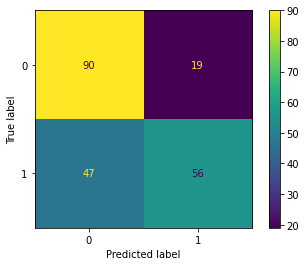

In [170]:
plot_confusion_matrix(model,xTScale,yT,values_format='d')

## 2) Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtScale, yt)

RandomForestClassifier()

In [204]:
model.score(xTScale, yT)

0.7405660377358491

In [205]:
pred = model.predict(xTScale)
pd.DataFrame

pandas.core.frame.DataFrame

In [206]:
print("Accuracy: ", metrics.accuracy_score(yT,y_pred=pred))
print("Precision: ", metrics.precision_score(yT,y_pred=pred))
print("Recall: ", metrics.recall_score(yT,y_pred=pred))
print("\n")
print(metrics.classification_report(yT,y_pred=pred))

Accuracy:  0.7405660377358491
Precision:  0.8428571428571429
Recall:  0.5728155339805825


              precision    recall  f1-score   support

           0       0.69      0.90      0.78       109
           1       0.84      0.57      0.68       103

    accuracy                           0.74       212
   macro avg       0.77      0.74      0.73       212
weighted avg       0.76      0.74      0.73       212



C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


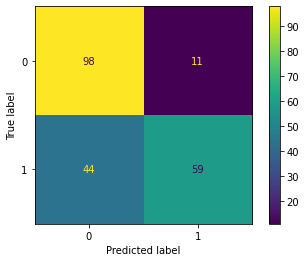

In [207]:
plot_confusion_matrix(model,xTScale,yT,values_format='d')

### Exporting Model

In [196]:
import pickle 
pickle.dump(model,open('RandomForest.pkl','wb'))

## 3) XGBoost

In [176]:
import xgboost as xgb 

In [177]:
model=xgb.XGBClassifier(objective='binary:logistic',missing=None)

In [178]:
model.fit(xtScale,yt,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(xTScale,yT)])

[0]	validation_0-aucpr:0.75145
[1]	validation_0-aucpr:0.76744
[2]	validation_0-aucpr:0.75415
[3]	validation_0-aucpr:0.76623
[4]	validation_0-aucpr:0.74694
[5]	validation_0-aucpr:0.76092
[6]	validation_0-aucpr:0.77204
[7]	validation_0-aucpr:0.77324
[8]	validation_0-aucpr:0.76987
[9]	validation_0-aucpr:0.77959
[10]	validation_0-aucpr:0.78571
[11]	validation_0-aucpr:0.78515
[12]	validation_0-aucpr:0.78379
[13]	validation_0-aucpr:0.78766
[14]	validation_0-aucpr:0.78904
[15]	validation_0-aucpr:0.79469
[16]	validation_0-aucpr:0.79643
[17]	validation_0-aucpr:0.79119
[18]	validation_0-aucpr:0.79502
[19]	validation_0-aucpr:0.79294
[20]	validation_0-aucpr:0.78895
[21]	validation_0-aucpr:0.79115
[22]	validation_0-aucpr:0.79264
[23]	validation_0-aucpr:0.79415
[24]	validation_0-aucpr:0.79578
[25]	validation_0-aucpr:0.79639


C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
model.score(xTScale,yT)

XGBoostError: [09:41:18] c:\users\administrator\workspace\xgboost-win64_release_1.5.1\src\c_api\c_api_utils.h:161: Invalid missing value: null

In [180]:
plot_confusion_matrix(model,xTScale,yT,values_format='d')

C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


XGBoostError: [09:43:23] c:\users\administrator\workspace\xgboost-win64_release_1.5.1\src\c_api\c_api_utils.h:161: Invalid missing value: null

## 4) SVM

In [181]:
from sklearn import svm

In [182]:
xChoosen=xOneHotN[fsDf.nlargest(10,columns='Score')['Category']]
xChoosen.drop(columns=['Year'],inplace=True)
xChoosen.head()

C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total Arrival,Max Temp °C,Min Price,Humidity(%),RainFall(mm),Min Temp °C,Max Price,Cloud(%),Chennai
0,0.065074,0.305556,0.165991,0.744444,0.003827,0.56250,0.204624,0.232323,0
1,0.058182,0.222222,0.133479,0.722222,0.066205,0.68750,0.152393,0.000000,0
2,0.064113,0.416667,0.084969,0.688889,0.066205,0.59375,0.118519,0.308625,0
3,0.059304,0.555556,0.053599,0.688889,0.066205,0.75000,0.073892,0.050505,0
4,0.062189,0.361111,0.054950,0.722222,0.022321,0.84375,0.079730,0.373737,0


In [183]:
xt,xT,yt,yT=train_test_split(xChoosen,Y,test_size=0.1,random_state=108)
xtScale=ScallerN.fit_transform(xt)
xTScale=ScallerN.fit_transform(xT)


In [184]:
cls = svm.SVC(kernel="linear")
cls.fit(xtScale, yt)

SVC(kernel='linear')

In [185]:
cls.score(xTScale, yT)

0.5774647887323944

In [186]:
pred = cls.predict(xTScale)
print("Accuracy: ", metrics.accuracy_score(yT,y_pred=pred))
print("Precision: ", metrics.precision_score(yT,y_pred=pred))
print("Recall: ", metrics.recall_score(yT,y_pred=pred))
print("\n")
print(metrics.classification_report(yT,y_pred=pred))

Accuracy:  0.5774647887323944
Precision:  0.5853658536585366
Recall:  0.6486486486486487


              precision    recall  f1-score   support

           0       0.57      0.50      0.53        34
           1       0.59      0.65      0.62        37

    accuracy                           0.58        71
   macro avg       0.58      0.57      0.57        71
weighted avg       0.58      0.58      0.58        71



C:\Users\sstudent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


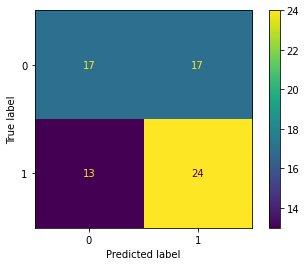

In [187]:
plot_confusion_matrix(cls,xTScale,yT,values_format='d')

## 5) ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(input_dim = 9, units = 10, activation='relu', kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units = 20, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 20, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xtScale,yt,batch_size=500, epochs=10)

In [ ]:
model.evaluate(xTScale,yT)